## Part 1: PCA

Perform PCA on PlayerAttributeData.csv. Analyze and interpret the results.
- How many principal components represent 80% variance in date?
- Can we use PCA to cluster players? If so, compare the results to the yesterday’s results

In [162]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [34]:
df_attribute = pd.read_csv('PlayerAttributeData.csv')

/Users/timothypillow/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Cleaning the data in the same way as yesterday, when we used the same dataset

In [35]:
df_attribute = df_attribute.drop(columns=['Unnamed: 0'])
df_attribute.drop_duplicates(keep='first')
df_attribute = df_attribute.drop(columns=['ID'])
df_attribute = df_attribute.astype(str)
df_attribute = df_attribute.applymap(eval)

In [36]:
df_attribute

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,24,16,38,26,12,23,14,13,12,5,...,40,19,19,10,32,28,11,50,26,6
17977,25,44,35,44,22,44,11,12,11,11,...,51,12,13,13,25,32,12,47,17,12
17978,66,26,60,77,41,50,28,32,37,47,...,54,42,42,14,51,33,17,32,37,33
17979,57,46,58,74,43,45,34,30,41,32,...,49,49,43,47,58,49,48,46,51,25


Some of the data has values above 100, so we will apply scaling to the dataset then transform (apply) these changes.

In [37]:
from sklearn.preprocessing import StandardScaler
# selecting all features (dataset)
# Standardizing the features
df_scaled = StandardScaler().fit_transform(df_attribute)

Scaled data outputs to an array, so we convert array -> dataframe and add the column names.

In [38]:
df_scaled = pd.DataFrame(df_scaled, columns = df_attribute.columns)

In [39]:
df_scaled

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,1.635276,0.409890,1.734125,-0.058049,2.076155,2.868223,1.906284,1.822459,1.891374,2.499538,...,3.713792,1.653450,2.201887,-1.050784,1.785015,1.802063,-0.753474,1.164848,2.220618,2.523668
1,1.836395,-0.448218,1.801721,2.211816,2.195199,2.945540,1.473142,2.255451,2.207275,2.550870,...,3.604850,1.988390,1.684864,-0.911191,1.512051,0.610215,-0.890829,-0.498923,2.567942,2.354551
2,1.970474,0.009440,2.207294,1.289683,2.195199,2.636272,1.364856,1.822459,2.154625,2.242878,...,2.842259,1.519474,1.397629,-0.585476,1.716774,0.923859,-1.073968,-0.974286,1.873295,2.241806
3,1.568237,1.267997,1.531338,-0.270849,1.957110,1.940418,1.473142,2.093079,1.628123,2.499538,...,3.386967,1.653450,1.799758,-0.352822,0.829642,1.613876,-0.112487,1.164848,2.151153,2.523668
4,-0.442951,-1.535154,-0.766912,-2.044182,-0.602346,0.935296,-1.883706,-1.803854,-1.320286,-1.658354,...,2.515434,-0.222214,-1.761956,-1.609153,-0.262212,-1.208921,-1.714955,1.402530,1.178648,-1.817005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,-2.722298,-2.278847,-1.713250,-2.682581,-2.745147,-2.698608,-1.937849,-1.857978,-2.267989,-2.069010,...,-2.386935,-2.633782,-2.106638,-1.655684,-2.241198,-2.212582,-1.669170,-1.211968,-1.877799,-2.098867
17977,-2.655258,-0.677046,-1.916036,-1.405782,-2.149925,-1.074949,-2.100277,-1.912102,-2.320639,-1.761018,...,-1.188578,-3.102698,-2.451321,-1.516091,-2.718884,-1.961667,-1.623385,-1.449650,-2.502981,-1.760633
17978,0.093366,-1.706775,-0.226147,0.935017,-1.019002,-0.611046,-1.179851,-0.829620,-0.951735,0.086934,...,-0.861754,-1.093058,-0.785357,-1.469561,-0.944621,-1.898938,-1.394461,-2.638058,-1.113687,-0.576813
17979,-0.509991,-0.562632,-0.361338,0.722217,-0.899957,-0.997632,-0.854995,-0.937869,-0.741134,-0.683046,...,-1.406461,-0.624142,-0.727910,0.065955,-0.466935,-0.895277,0.024867,-1.528877,-0.141182,-1.027792


### How many principal components represent 80% variance in date?

Use Principal Component Analysis (PCA) to cluster the data

Within our PCA function, we can actually specifiy the n_componets as 0.8, so that it automatically uses the number of components that correspond to explaining 80% of variance of our orginal dataset.

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.8)
principalComponents = pca.fit_transform(df_scaled)

In [95]:
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.552833   0.14842436 0.06922192 0.05016184]
[[-0.16351797 -0.14523066 -0.1652515  -0.14523104 -0.21993579 -0.17958074
  -0.20027475 -0.19627688 -0.21287823 -0.17828212 -0.1839609   0.19715306
   0.19663755  0.19598498  0.19622536  0.19698035 -0.16602513 -0.11523976
  -0.05636725 -0.18594164 -0.19531085 -0.10745984 -0.18189086 -0.20005659
  -0.09425611 -0.21029805 -0.19683039 -0.10879713 -0.16274646 -0.18536817
  -0.11514322 -0.02571805 -0.16217831 -0.18483808]
 [-0.12128051  0.253667   -0.1601621  -0.13330959 -0.04252492  0.02768465
  -0.0400234  -0.11694479 -0.10941027 -0.22136889 -0.09279201 -0.08045797
  -0.08089915 -0.08124878 -0.07950877 -0.08083617  0.17020962  0.34689904
   0.11677916  0.06623392 -0.14301581  0.36722989 -0.14415594 -0.15302229
   0.01326299  0.02499962 -0.0780131   0.36153891 -0.10039936  0.10006713
   0.35992292  0.22331236 -0.14720699 -0.17886013]
 [-0.1957249   0.11880609 -0.08862286 -0.18410158  0.03370571  0.2363729
   0.03081093  0.10317967 -0.02427441  

In [98]:
pd.DataFrame(principalComponents)

,0,1,2,3
0,-8.101170,-3.669378,4.314673,0.947103
1,-7.887906,-5.312511,3.322627,-0.891307
2,-7.090662,-4.741020,2.418200,-1.015107
3,-6.348112,-3.286255,5.446978,0.151027
4,8.580290,-1.745858,6.883536,-2.429981
...,...,...,...,...
17976,11.773938,-1.025349,-1.433162,0.941355
17977,10.583311,-0.344724,-0.787765,0.823313
17978,3.120534,-2.613883,-2.804034,0.610193
17979,2.333342,0.353947,-2.619692,-0.426111


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(pca.components_[0]
               , pca.components_[1])
ax.legend(targets)
ax.grid()

In [96]:
for i in pca.explained_variance_ratio_:
    print(i)

0.5528330049259411
0.14842436251163138
0.0692219187023794
0.050161836358532476


We have 4 components that explain 80% of variance. We can verify this by summing:

In [104]:
a = pca.explained_variance_ratio_
sum = a[0] + a[1] + a[2] + a[3] 
print(sum)

0.8206411224984843


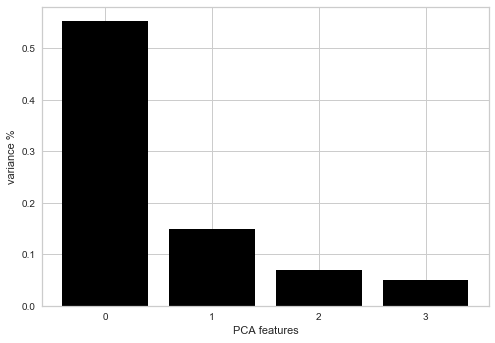

In [140]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

We can also plot all the PCA features to see how %variance drops off

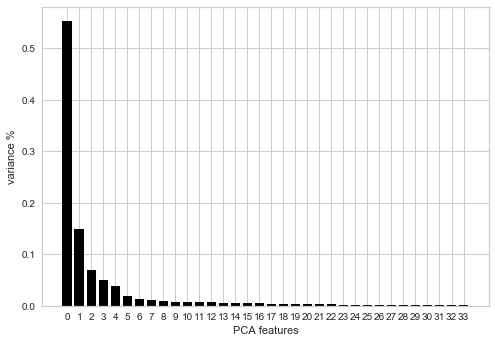

In [145]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=34)
principalComponents2 = pca2.fit_transform(df_scaled)

features = range(pca2.n_components_)
plt.bar(features, pca2.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components2 = pd.DataFrame(principalComponents2)

Plotting the first 2 PCA components

Text(0, 0.5, 'PCA 2')

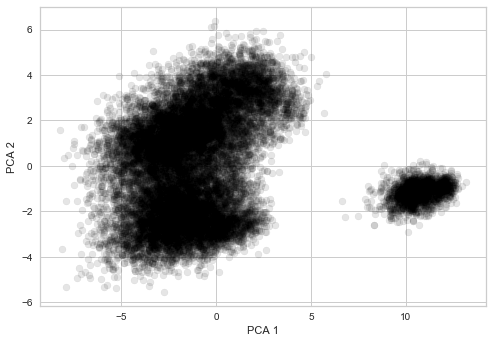

In [149]:
plt.scatter(PCA_components2[0], PCA_components2[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

We can see that 2 clusters does not split the data very much

Plotting the 3rd and 4th components

Text(0, 0.5, 'PCA 4')

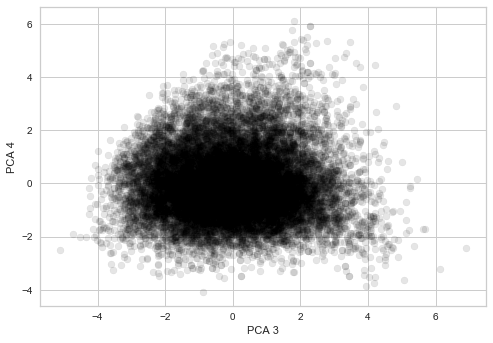

In [150]:

plt.scatter(PCA_components2[2], PCA_components2[3], alpha=.1, color='black')
plt.xlabel('PCA 3')
plt.ylabel('PCA 4')

Notice how with increasing components, the clustering seperation is reduced.

### Can we use PCA to cluster players? If so, compare the results to the yesterday’s results

In our plots above, we see that PCA first 2 components splits the data the most, then additional components offer only minor improvements in splitting.

In this step, we will use k-means clustering to view the top three PCA components. In order to do this, we will first fit these principal components to the k-means algorithm and determine the best number of clusters. 

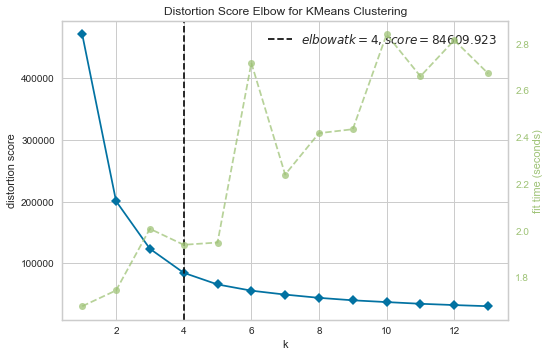

''

In [151]:
# Instantiate the clustering model and visualizer
model = KMeans(
    n_clusters=12,
    init='k-means++',
    n_init=10,
    max_iter=200,
    tol=0.0001,
    precompute_distances='auto',
    verbose=2,
    random_state=None,
    copy_x=True,
    n_jobs=-1,
    algorithm='auto',
)
visualizer = KElbowVisualizer(model, k=(1,14))

visualizer.fit(PCA_components2.iloc[:,:3])      # Fit the data to the visualizer using only first 3 PCA components
visualizer.show()                               # Finalize and render the figure
; 

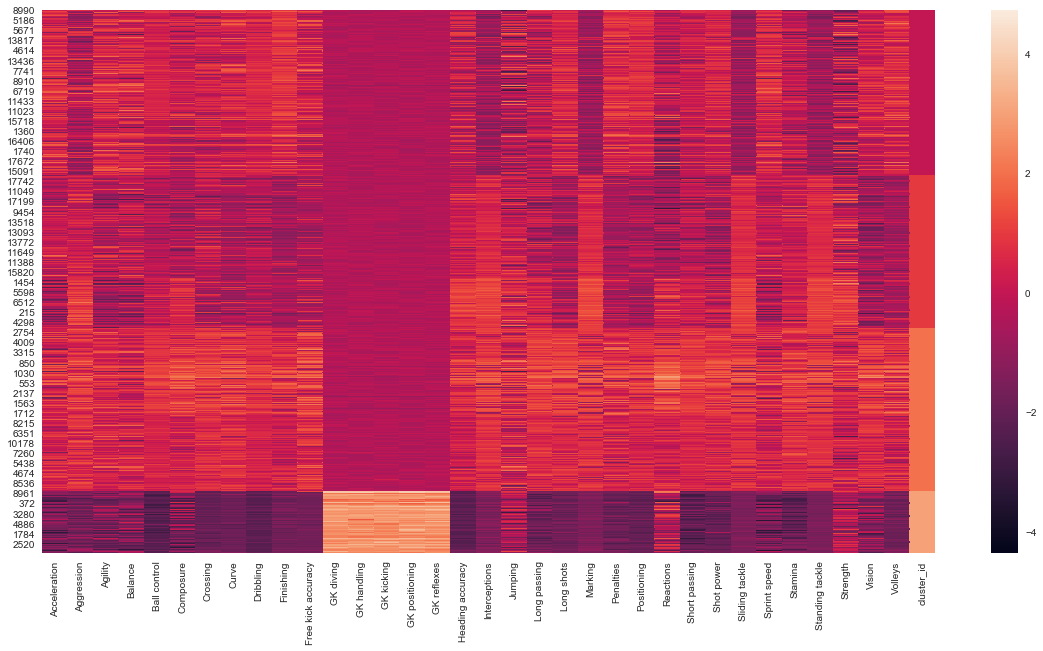

In [152]:
modfit = KMeans(n_clusters=4).fit(df_scaled)
labels = modfit.predict(df_scaled)
df_scaled['cluster_id'] = labels
df_scaled2 = df_scaled.sort_values(by='cluster_id')
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(df_scaled2)

In summary, the heatmap produced above used our first 3 PCA components, since we observed that diministing splitting occured beyond this. Then we fed these principal components to the k-means algorithm and determined that optimal number of clusters was 4.

### Part 2: LOF - Isolation Forest (Bonus)

Apply LOF and Isolation Forest to the Arrhythmia dataset
Use visualizations to show the detected outliers.



In [153]:
df_arr = pd.read_csv('arrhythmia.csv')

In [173]:
df_arr

,sex,di_width_ragged_r_wave,di_width_diphasic_derivation_of_r_wave,di_width_ragged_p_wave,di_width_diphasic_derivation_of_p_wave,di_width_ragged_t_wave,di_width_diphasic_derivation_of_t_wave,dii_width_ragged_r_wave,dii_width_diphasic_derivation_of_r_wave,dii_width_ragged_p_wave,...,v5_amp_qrsta,v6_amp_jj_wave,v6_amp_q_wave,v6_amp_r_wave,v6_amp_s_wave,v6_amp_rp_wave,v6_amp_p_wave,v6_amp_t_wave,v6_amp_qrsa,v6_amp_qrsta
0,1,0,0,0,0,0,0,0,0,0,...,0.562792,-0.674491,0.000000,-0.087679,0.674491,0.0,-1.011736,0.674491,0.209639,0.633789
1,0,0,0,0,0,0,0,0,0,0,...,0.769005,2.473133,0.000000,0.200103,-0.797125,0.0,-0.674491,1.770538,-0.528655,1.226875
2,0,0,0,0,0,0,0,0,0,0,...,1.619637,0.674491,0.000000,0.922430,-0.674491,0.0,-0.337245,1.096047,1.503932,1.959512
3,0,0,0,0,0,0,0,0,0,0,...,0.799078,-0.449661,0.000000,1.148664,-1.532934,0.0,-2.023472,2.192095,0.665376,2.029287
4,0,0,0,0,0,0,0,0,0,0,...,0.807670,0.449661,-1.092245,0.922430,-1.042395,0.0,1.348982,0.758802,-0.419278,0.186066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,1,0,0,0,0,0,0,0,0,0,...,-1.327501,0.449661,0.000000,-1.484238,-2.391376,0.0,0.674491,-0.590179,-2.050816,-1.651339
447,0,0,0,0,0,0,0,0,0,0,...,2.242574,-0.674491,0.000000,1.746696,-0.306587,0.0,-0.337245,0.927425,1.813833,2.006029
448,0,0,0,0,0,0,0,0,0,0,...,-4.034056,3.147624,0.000000,1.907136,-16.862269,0.0,3.372454,-0.252934,-5.678483,-3.552706
449,1,0,0,0,0,0,0,0,0,0,...,1.318909,0.899321,-0.728163,0.871265,0.245269,0.0,0.000000,0.927425,0.628917,1.087326


In [181]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=262)
principalComponents3 = pca3.fit_transform(df_arr)

features = range(pca3.n_components_)
plt.bar(features, pca2.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components3 = pd.DataFrame(principalComponents3)

ValueError: object arrays are not supported

In [182]:
df_arr.dtypes

sex                                         int64
di_width_ragged_r_wave                      int64
di_width_diphasic_derivation_of_r_wave      int64
di_width_ragged_p_wave                      int64
di_width_diphasic_derivation_of_p_wave      int64
                                           ...   
v6_amp_rp_wave                            float64
v6_amp_p_wave                             float64
v6_amp_t_wave                             float64
v6_amp_qrsa                               float64
v6_amp_qrsta                              float64
Length: 263, dtype: object

In [174]:
clf = LocalOutlierFactor(
    n_neighbors=20,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    contamination='auto',
    novelty=False,
    n_jobs=-1,
)

clf.fit_predict(df_arr.iloc[:,:262])

array([ 1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1